<a href="https://colab.research.google.com/github/Wayne213/kbsproject/blob/main/heartdiseaseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# R178512E ANESU CHITSIKU
# R178527F RUMBIDZAI MUSENDO
# R178495N WAYNE MAISENI

#HEART DISEASE PREDICTION MODEL

# Import libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
# Importing dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing the dataset
dataset=pd.read_csv('/content/drive/My Drive/KBS Assignment1/heart.csv')

In [ ]:
dataset.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

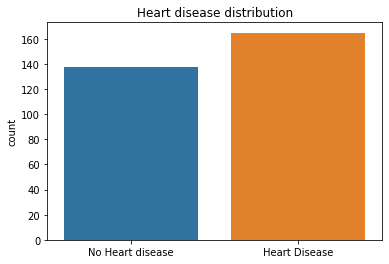

In [ ]:
f = sns.countplot(x='target', data=dataset)
f.set_title("Heart disease distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

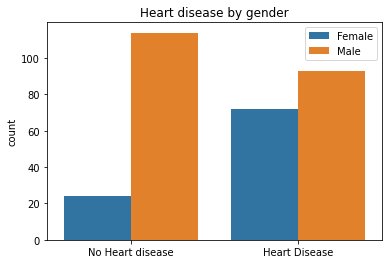

In [ ]:
f = sns.countplot(x='target', data=dataset, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart disease by gender")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

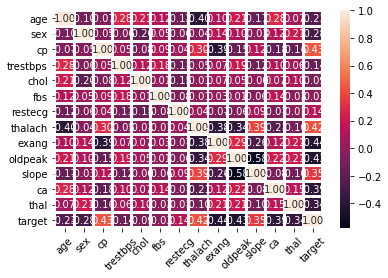

In [ ]:
heat_map = sns.heatmap(dataset.corr(method='pearson'), annot=True, fmt='.2f', linewidths=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45);
plt.rcParams["figure.figsize"] = (50,50)

In [ ]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
# importing pandas profiling and warning filters
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Splitting the dataset into the Training set and Test set for validation
#Normalization, scaling and transformation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Normalization, scaling and transformation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#creation of an Artificial Neural Network as Deep Learning Model
#initialization
ann = tf.keras.models.Sequential()
#Addition of the input layer and the first hidden layer, second hidden layer and the outer layer
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
#Model Compilation
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#training the model
ann.fit(X_train, y_train, batch_size = 32, epochs = 75)

Epoch 1/75
8/8 [==============================] - 4s 3ms/step - loss: 0.6357 - accuracy: 0.6818
Epoch 2/75
8/8 [==============================] - 0s 3ms/step - loss: 0.6259 - accuracy: 0.6983
Epoch 3/75
8/8 [==============================] - 0s 3ms/step - loss: 0.6170 - accuracy: 0.7066
Epoch 4/75
8/8 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.7314
Epoch 5/75
8/8 [==============================] - 0s 3ms/step - loss: 0.6010 - accuracy: 0.7397
Epoch 6/75
8/8 [==============================] - 0s 3ms/step - loss: 0.5926 - accuracy: 0.7521
Epoch 7/75
8/8 [==============================] - 0s 3ms/step - loss: 0.5849 - accuracy: 0.7645
Epoch 8/75
8/8 [==============================] - 0s 3ms/step - loss: 0.5776 - accuracy: 0.7727
Epoch 9/75
8/8 [==============================] - 0s 3ms/step - loss: 0.5706 - accuracy: 0.7893
Epoch 10/75
8/8 [==============================] - 0s 3ms/step - loss: 0.5637 - accuracy: 0.7975
Epoch 11/75
8/8 [======================

In [ ]:
#Visualization of the rules, trends or patterns
#Predicting the Test set results without supervision thus unsupervised learning
#this is an implemententation of deep learning neural network using ANN
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]]


In [ ]:
#making a confusion matrix inorder to describe the performance of the model
#Model evaluation technique
#our prediction was based on the test data and its accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

[[21  6]
 [ 5 29]]
Accuracy: 81.97%


In [ ]:
from sklearn.naive_bayes import MultinomialNB
multiNB = MultinomialNB()

multiNB.fit(y_pred, y_test)
accuracy5 = multiNB.score(y_pred, y_test)
print('Multinomial NB Accuracy -->',((accuracy5)*100))

Multinomial NB Accuracy --> 55.73770491803278
